# PART I

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc,9.97,0.25,9.52,10.44,0.01,0.00,1518.31,1993.02,1.0
df,40.19,27.99,3.00,89.00,1.47,1.04,329.99,357.13,1.0
scale,2.34,0.22,1.93,2.75,0.01,0.01,682.12,799.60,1.0


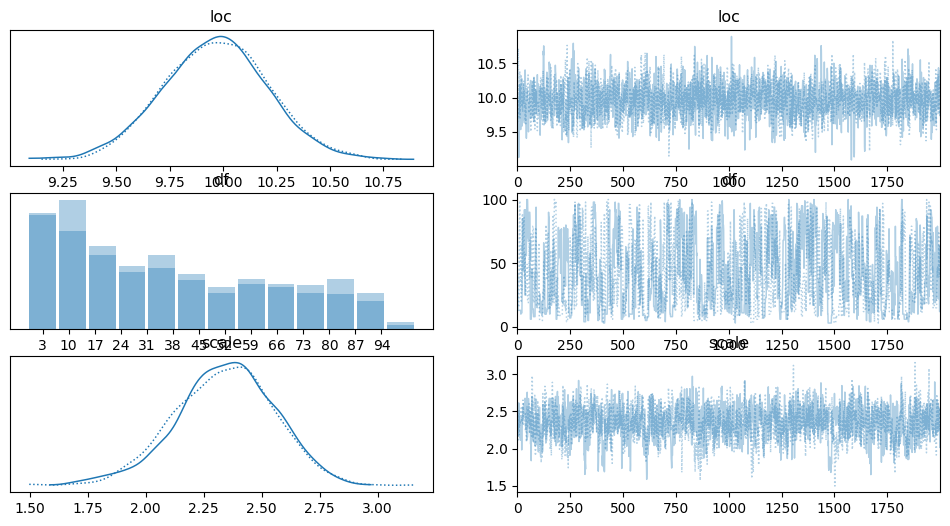

In [16]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# Simulated data (use the data you generated with the given code snippet)
n, loc_true, scale_true, df_true = 100, 10, 2, 15
x = np.random.standard_t(df=df_true, size=n) * scale_true + loc_true

# Model specification in PyMC
with pm.Model() as model:
    # Define priors for the unknown model parameters
    loc = pm.Normal('loc', mu=0, sigma=10)
    scale = pm.HalfNormal('scale', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=100)

    # Define the likelihood
    likelihood = pm.StudentT('x', mu=loc, sigma=scale, nu=df, observed=x)

    # Sample from the posterior using the HMC algorithm
    trace = pm.sample(2000, tune=500, target_accept=0.95, cores=2)

# Analyzing the posterior samples
az.plot_trace(trace)
az.summary(trace, round_to=2)

In [17]:
import pymc as pm
import arviz as az

def run_hmc_for_sample_size(sample_size, total_samples=2000):

    loc_true, scale_true, df_true = 10, 2, 15
    x = np.random.standard_t(df=df_true, size=sample_size) * scale_true + loc_true

    with pm.Model() as model:
        loc = pm.Normal('loc', mu=0, sigma=10)
        scale = pm.HalfNormal('scale', sigma=5)
        df = pm.DiscreteUniform('df', lower=1, upper=100)
        likelihood = pm.StudentT('x', mu=loc, sigma=scale, nu=df, observed=x)

        trace = pm.sample(total_samples, tune=500, target_accept=0.95, cores=2)

    ess = az.ess(trace)["df"]

    return ess, trace


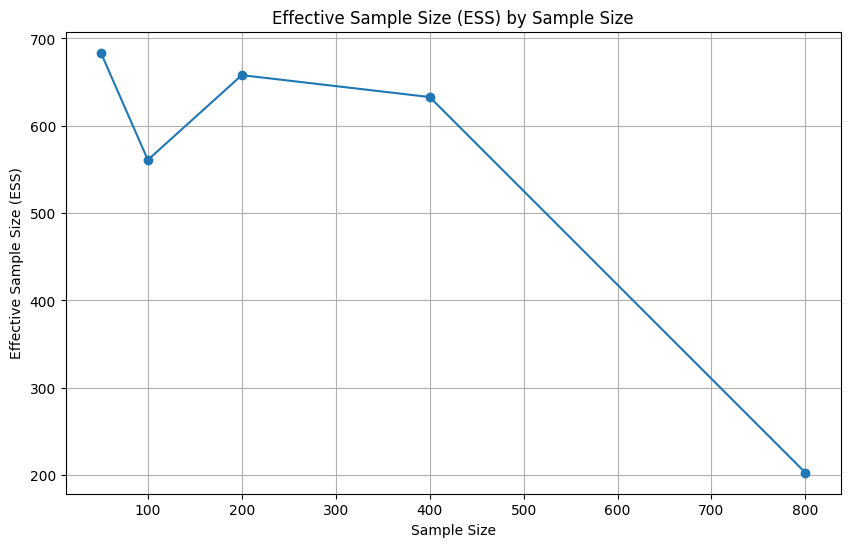

Sample Size: 50


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
df,51.444,28.136,6.0,96.0,1.051,0.744,684.0,721.0,1.0


Sample Size: 100


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
df,53.731,26.382,13.0,99.0,1.106,0.782,561.0,968.0,1.0


Sample Size: 200


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
df,55.326,26.508,11.0,96.0,1.035,0.732,658.0,872.0,1.0


Sample Size: 400


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
df,52.218,26.084,11.0,95.0,1.01,0.715,633.0,612.0,1.0


Sample Size: 800


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
df,29.862,22.194,6.0,77.0,1.392,0.986,203.0,239.0,1.01


In [18]:
sample_sizes = [50, 100, 200, 400, 800]  # Example sample sizes
ess_results = []
traces = []

for s in sample_sizes:
    ess, trace = run_hmc_for_sample_size(s)
    ess_results.append(ess)
    traces.append(trace)

# Now we have ESS and trace for each sample size in ess_results and traces respectively

# Plotting Effective Sample Size (ESS) for each sample size
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, ess_results, marker='o')
plt.title('Effective Sample Size (ESS) by Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Effective Sample Size (ESS)')
plt.grid(True)
plt.show()

# Posterior summary for `df` parameter across different sample sizes
for i, trace in enumerate(traces):
    print(f'Sample Size: {sample_sizes[i]}')
    display(az.summary(trace, var_names=['df']))

# PARTII

Centered ESS: <xarray.Dataset>
Dimensions:      (theta_dim_0: 8)
Coordinates:
  * theta_dim_0  (theta_dim_0) int64 0 1 2 3 4 5 6 7
Data variables:
    mu           float64 338.0
    theta        (theta_dim_0) float64 492.8 594.9 527.4 ... 595.6 471.5 571.7
    tau          float64 30.33
Uncentered ESS: <xarray.Dataset>
Dimensions:            (theta_tilde_dim_0: 8, theta_dim_0: 8)
Coordinates:
  * theta_tilde_dim_0  (theta_tilde_dim_0) int64 0 1 2 3 4 5 6 7
  * theta_dim_0        (theta_dim_0) int64 0 1 2 3 4 5 6 7
Data variables:
    mu                 float64 1.723e+03
    theta_tilde        (theta_tilde_dim_0) float64 2.19e+03 ... 1.752e+03
    tau                float64 907.4
    theta              (theta_dim_0) float64 1.645e+03 2.094e+03 ... 1.63e+03
Centered R-hat: <xarray.Dataset>
Dimensions:      (theta_dim_0: 8)
Coordinates:
  * theta_dim_0  (theta_dim_0) int64 0 1 2 3 4 5 6 7
Data variables:
    mu           float64 1.015
    theta        (theta_dim_0) float64 1.01 1.02 1.017

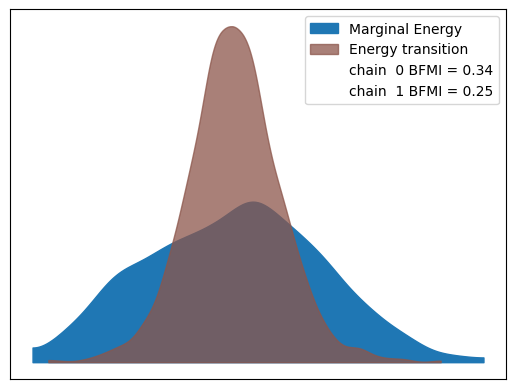

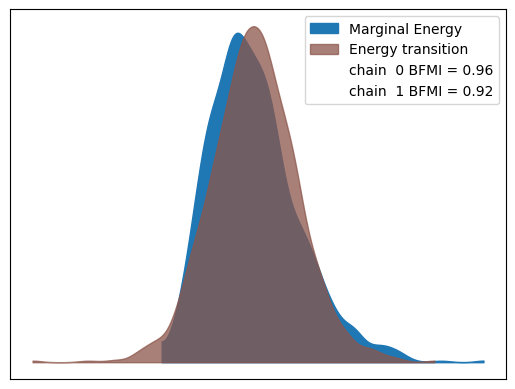

In [19]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

# Eight Schools data
J = 8  # number of schools
y = np.array([28, 8, -3, 7, -1, 1, 18, 12])
sigma = np.array([15, 10, 16, 11, 9, 11, 10, 18])

# Centered model
with pm.Model() as centered_model:
    mu = pm.Normal('mu', mu=0, sigma=5)
    tau = pm.HalfCauchy('tau', beta=5)
    theta = pm.Normal('theta', mu=mu, sigma=tau, shape=J)
    obs = pm.Normal('obs', mu=theta, sigma=sigma, observed=y)
    trace_centered = pm.sample(1000, tune=1000)

SEED = [20100420, 20134234] # random seeds for each of two run HMC chains
with centered_model:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})

# Uncentered model
with pm.Model() as uncentered_model:
    mu = pm.Normal('mu', mu=0, sigma=5)
    tau = pm.HalfCauchy('tau', beta=5)
    theta_tilde = pm.Normal('theta_tilde', mu=0, sigma=1, shape=J)
    theta = pm.Deterministic('theta', mu + tau * theta_tilde)
    obs = pm.Normal('obs', mu=theta, sigma=sigma, observed=y)
    trace_uncentered = pm.sample(1000, tune=1000)

with uncentered_model:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True})

# Diagnostics
ess_centered = az.ess(trace_centered)
ess_uncentered = az.ess(trace_uncentered)
rhat_centered = az.rhat(trace_centered)
rhat_uncentered = az.rhat(trace_uncentered)

# Print diagnostics
print(f'Centered ESS: {ess_centered}\nUncentered ESS: {ess_uncentered}')
print(f'Centered R-hat: {rhat_centered}\nUncentered R-hat: {rhat_uncentered}')

# Plot energy distributions
az.plot_energy(trace_centered)
plt.show()

az.plot_energy(trace_uncentered)
plt.show()


The "centered" model displays a overlap between the marginal and transition energy distributions, BFMI = 0.30. This suggests that the HMC sampler may be performing adequately. “Uncentered" model shows a clearer separation between the energy distributions, with the BFMI values reaching near or at the ideal of 1. This suggests a more effective sampling process by the HMC.These diagnostics supports that the "uncentered" parameterization provides a better fitting process for HMC, as it appears to facilitate more efficient navigation of the posterior distribution.